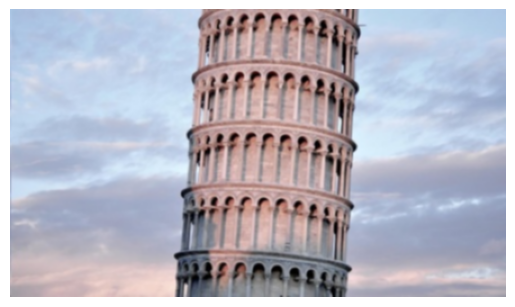

In [2]:
import cv2
import matplotlib.pyplot as plt

def apply_blur(image, blur_value):
    # Kiểm tra nếu ảnh đầu vào có hợp lệ không
    if image is None:
        print("Lỗi: Không tìm thấy hoặc không thể tải ảnh")
        return

    # Chuyển đổi giá trị blur thành giá trị kernel
    kernel_size = max(1, int((blur_value / 100) * 20) + 1)  # Ensure it's odd
    if kernel_size % 2 == 0:
        kernel_size += 1

    # Áp dụng làm mờ Gaussian
    img_blur = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    # Hiện ảnh
    plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis
    plt.show()

# Test
image = cv2.imread("./Artistic/data/inp_images/tower.jpeg")
apply_blur(image, 5)

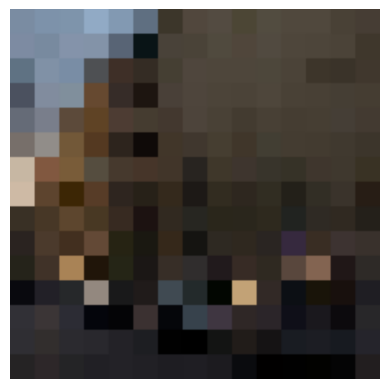

In [58]:
import cv2
import matplotlib.pyplot as plt

def apply_pixelate(image, pixelate_value):
    # Kiểm tra nếu ảnh đầu vào có hợp lệ không
    if image is None:
        print("Lỗi: Không tìm thấy hoặc không thể tải ảnh")
        return

    # Điều chỉnh giá trị về khoảng 1-20
    pixelate_value = max(1, min(pixelate_value, 20))

    # Calculate the scaling factor based on the pixelate value
    # Scale factor calculation: higher pixelate_value means bigger blocks
    scale_factor = pixelate_value  # Directly use pixelate_value for scaling

    # Resize to smaller dimensions
    small_image = cv2.resize(image, (image.shape[1] // scale_factor, image.shape[0] // scale_factor), interpolation=cv2.INTER_LINEAR)
    
    # Resize back to original dimensions
    pixelated_image = cv2.resize(small_image, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Display the pixelated image
    plt.imshow(cv2.cvtColor(pixelated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Test
input_image = cv2.imread("./Images/color/0.jpg")
apply_pixelate(input_image, 10)
